In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = pd.read_csv("iris_with_species.csv")

In [43]:
petal_or_sepal = "sepal"

In [44]:
def scale_data(data):
    scaler = preprocessing.StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    return data_scaled

In [45]:
def screen_data(petal_sepal):
    if petal_sepal == "sepal":
        data_select = data.iloc[:, :-3]
        return data_select
    elif petal_sepal == "petal":
        data_select = data.iloc[:, 2:-1]
        return data_select

In [46]:
def scater_plot(data, value):
    x_values = f"{value}_length"
    y_values = f"{value}_width"
    x_label = f"Length of {value}"
    y_label = f"Width of {value}"

    if "cluster_pred" in data.columns:
        plt.scatter(data[x_values], data[y_values], c=data["cluster_pred"], cmap="rainbow")
    else:
        plt.scatter(data[x_values], data[y_values])
        
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

In [57]:
def elbow_method(clusters, data):
    wcss = list()
    clusters = clusters
    for c in range(1, clusters):
        kmeans = KMeans(c)
        kmeans.fit(data)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    
    number_clusters = range(1, clusters)
    plt.plot(number_clusters, wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')
    return plt.show()

In [63]:
data_a = screen_data("petal")

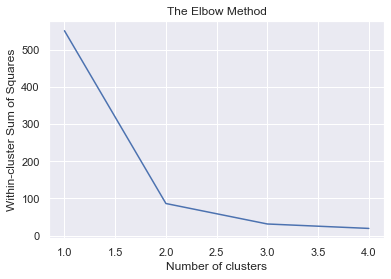

In [70]:
elbow_method(clusters=5, data=data_a)

In [56]:
range(1,10)

range(1, 10)

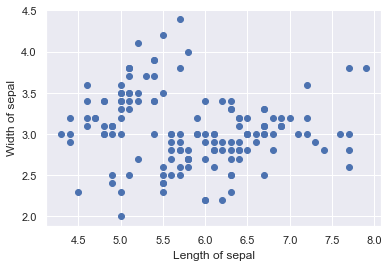

In [26]:
scater_plot(data=data_a, value=petal_or_sepal)

In [27]:
number_of_clusters = 2
data_c = data_a.copy()
kmeans = KMeans(number_of_clusters)
kmeans.fit(data_c)

data_c["cluster_pred"] = kmeans.fit_predict(data_c)
data_c

,sepal_length,sepal_width,cluster_pred
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


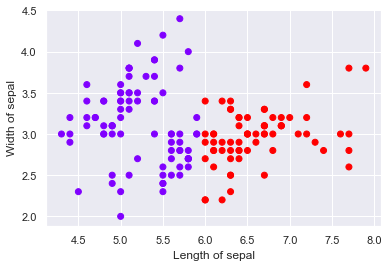

In [28]:
scater_plot(data=data_c, value=petal_or_sepal)